# Predicting Car Prices: An Exploration of Key Factors


<h3>This project aims to identify the most significant characteristics impacting car prices using machine learning algorithms and data analysis techniques.</h3>



<h3>What are the main characteristics that have the most impact on the car price?</h3>


<h2 id="import_data">1. Import Data from Module 2</h2>


Import libraries below:


In [1]:
#your code
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score


Load the data and store it in dataframe `df`:


In [8]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

load your data

In [2]:

carDF = pd.read_csv(r'C:\Users\User\Desktop\DATE WITH PRINCE\PYTHON\automobileEDA.csv')

view first few rows of your data

In [12]:
#df...
print(carDF.head())

   symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0    

<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


import matplotlib

In [51]:
print(carDF.describe)

<bound method NDFrame.describe of      symboling  normalized-losses         make aspiration num-of-doors  \
0            3                122  alfa-romero        std          two   
1            3                122  alfa-romero        std          two   
2            1                122  alfa-romero        std          two   
3            2                164         audi        std         four   
4            2                164         audi        std         four   
..         ...                ...          ...        ...          ...   
196         -1                 95        volvo        std         four   
197         -1                 95        volvo      turbo         four   
198         -1                 95        volvo        std         four   
199         -1                 95        volvo      turbo         four   
200         -1                 95        volvo      turbo         four   

      body-style drive-wheels engine-location  wheel-base    length  ...  \
0

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important you first understand what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [19]:
# list the data types for each column
print(carDF.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "peak-rpm"? </b>

</div>


In [3]:
#your code
float64

For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


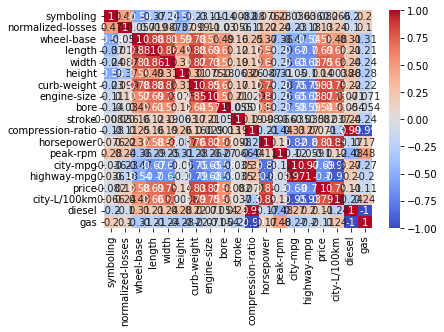

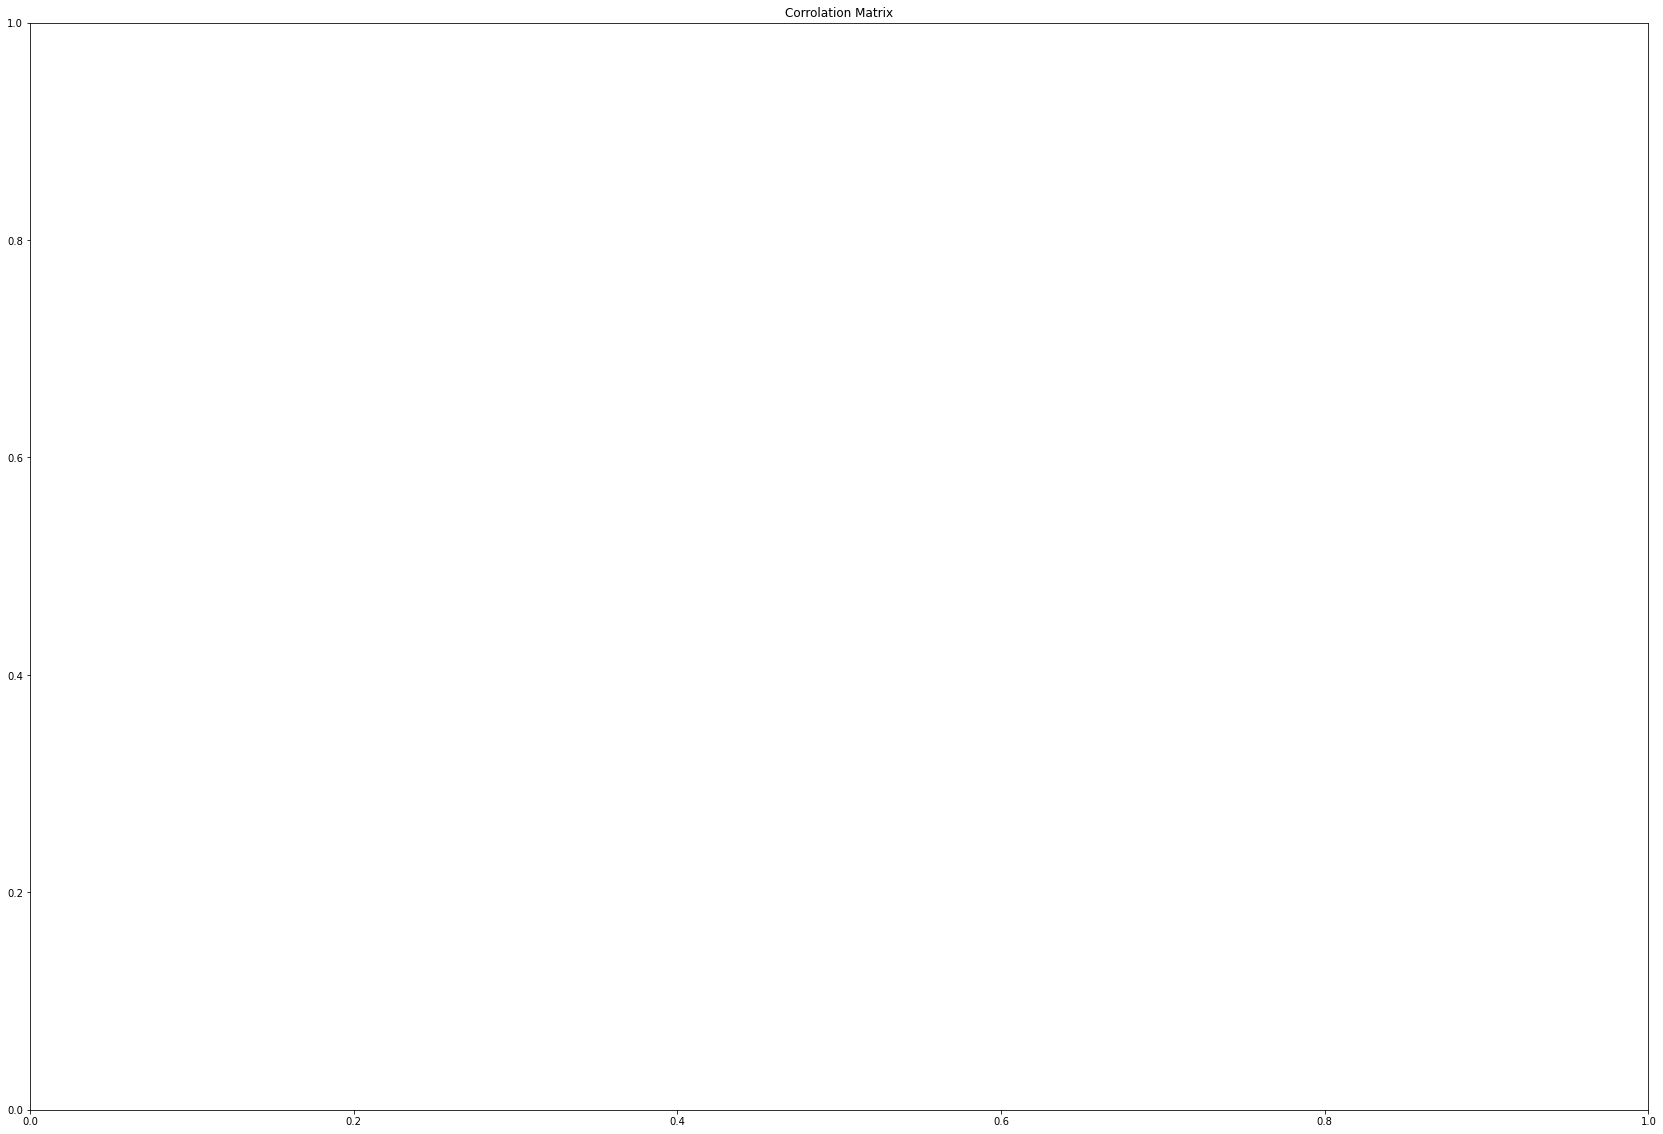

In [38]:
#here is how
corrolation_matrix = carDF.corr()
sns.heatmap(corrolation_matrix,annot=True,cmap = 'coolwarm')
plt.figure(figsize=(29,20))
plt.title('Corrolation Matrix')
plt.show()

The diagonal elements are always one; I will implement correlation more precisely Pearson correlation in-depth at the end of the project notebook.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.</p>
    
__just select the columns and use .corr()__

In [22]:
# Write your code below and press Shift+Enter to execute 
#df[['col1', 'col2']].corr()
carDF[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, I use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>

<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "engine-size" and "price".


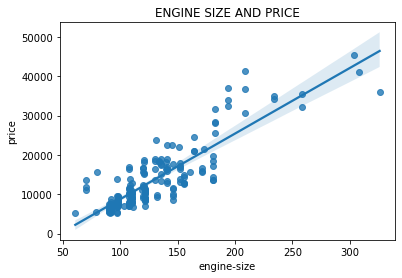

In [28]:
# Engine size as potential predictor variable of price, 
# use scatter plot to confirm this and add a regression line(line of best fit) 

sns.regplot(x='engine-size', y='price', data = carDF)
plt.title('ENGINE SIZE AND PRICE')
plt.show()

<p>What did you find out on the scatter plot?? Tell me here.</p>


As the price of the size of the engine increases the price of the car do increase also so both size of engine and  price are positively corolated.

examine the correlation between 'engine-size' and 'price' and you see it's approximately 0.87.

In [26]:
#your code to confirm the correlation
carDF[['engine-size','price']].corr()


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".


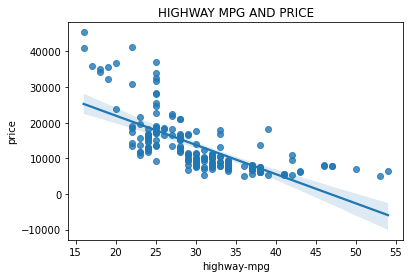

In [30]:
#your code here, add line of fit
sns.regplot(x='highway-mpg', y = 'price', data = carDF)
plt.title('HIGHWAY MPG AND PRICE')
plt.show()


<p>Tell me what the relationship looks like here</p>


we have a negative corrolation as the price is going down the mpg is going high

correlation between 'highway-mpg' and 'price' and see it's approximately -0.704. confirm this below below

In [32]:
##add your code here
carDF[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "peak-rpm" is a predictor variable of "price".

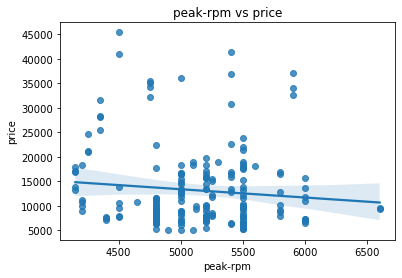

In [40]:
sns.regplot(x = 'peak-rpm', y = 'price',data = carDF)
plt.title("peak-rpm vs price")
plt.show()



<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616. Confirm this below


In [13]:
carDF[['price','peak-rpm']].corr()

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="stroke" and y="price".</p>

In [42]:
carDF[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between "price" and "stroke", expect a linear relationship?</p> 
<p>Verify results using matplotlib and best of line fit.</p>
</div>


In [45]:
# Write your code below and press Shift+Enter to execute 
carDF[['price', 'stroke']].corr()
# plt.title('stroke vs price')
# plt.show()

,price,stroke
price,1.00000,0.08231
stroke,0.08231,1.00000


<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots</p>


Let's look at the relationship between "body-style" and "price".


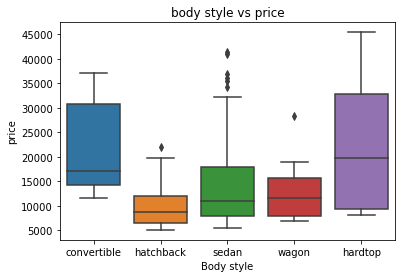

In [47]:
sns.boxplot(x ='body-style', y = 'price',data = carDF)
plt.title('body style vs price')
plt.xlabel('Body style')
plt.ylabel('price')
plt.show()

What did you observe above?

What about engine-location and price? Check it below

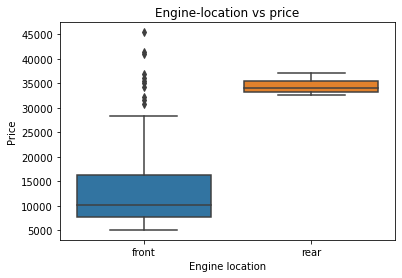

In [48]:
sns.boxplot(x='engine-location', y='price',data = carDF)
plt.title('Engine-location vs price')
plt.xlabel('Engine location')
plt.ylabel('Price')
plt.show()

<p>What did you observe?</p>


Let's examine "drive-wheels" and "price".


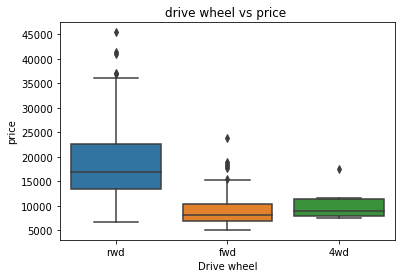

In [49]:
sns.boxplot(x='drive-wheels',y = 'price', data = carDF)
plt.title('drive wheel vs price ')
plt.xlabel('Drive wheel')
plt.ylabel('price')
plt.show()

<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


Use describe to get all the statistical summary above


In [50]:
carDF.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' do this to return only object type columns and their statistics


To get object type columns

In [58]:
objectColumns = carDF.select_dtypes('object').columns
# Descriptive statistics for object column
for column in objectColumns:
    print(f"Descriptive statistics for {column}:")
    print(carDF[column].describe())

Descriptive statistics for make:
count        201
unique        22
top       toyota
freq          32
Name: make, dtype: object
Descriptive statistics for aspiration:
count     201
unique      2
top       std
freq      165
Name: aspiration, dtype: object
Descriptive statistics for num-of-doors:
count      201
unique       2
top       four
freq       115
Name: num-of-doors, dtype: object
Descriptive statistics for body-style:
count       201
unique        5
top       sedan
freq         94
Name: body-style, dtype: object
Descriptive statistics for drive-wheels:
count     201
unique      3
top       fwd
freq      118
Name: drive-wheels, dtype: object
Descriptive statistics for engine-location:
count       201
unique        2
top       front
freq        198
Name: engine-location, dtype: object
Descriptive statistics for engine-type:
count     201
unique      6
top       ohc
freq      145
Name: engine-type, dtype: object
Descriptive statistics for num-of-cylinders:
count      201
unique     

<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. I apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, I only include one bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p>

In [67]:
driveWheel = carDF['drive-wheels'].value_counts()
print(driveWheel)

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64


I convert the series to a dataframe as follows:

In [68]:
#Uncomment and run this cell
#df['drive-wheels'].value_counts().to_frame()
carDF['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, I group by the variable "drive-wheels" and see that there are 3 different categories of drive wheels.</p>

In [72]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>I want to know, on average, which type of drive wheel is most valuable, I group "drive-wheels" and then average them.</p>

<p>I select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>

In [40]:
df_group_one = df[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.


In [41]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

<ipython-input-41-10e240e527d5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "price" of each car based on "body-style".</p>
</div>


In [5]:
# Write your code below and press Shift+Enter to execute 
carDF['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [11]:
carDF_group = carDF.groupby('body-style')['price'].mean()
print(carDF_group)


body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          12371.960000
Name: price, dtype: float64


<h4>Variables: Drive Wheels and Body Style vs. Price</h4>
